In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-10-07 23:58:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.6’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.006s  

2025-10-07 23:58:43 (139 MB/s) - ‘car_fuel_efficiency.csv.6’ saved [874188/874188]



In [4]:
df = pd.read_csv(data)

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset

Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'


In [6]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

df_select = df[features]

### EDA

Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

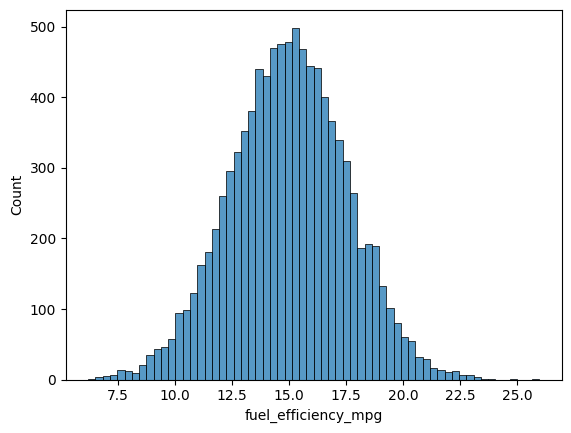

In [7]:
sns.histplot(df_select['fuel_efficiency_mpg'])

### Question 1

There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [8]:
df_select.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


Answer: 'engine_displacement'

### Question 2
What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [9]:
df_select['horsepower'].median()

149.0

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [10]:
n = len(df_select)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [11]:
idx = np.arange(n)

In [12]:
np.random.seed(2)
np.random.shuffle(idx)

In [13]:
df_train = df_select.iloc[idx[:n_train]]
df_val = df_select.iloc[idx[n_train:n_train+n_val]]
df_test = df_select.iloc[idx[n_train+n_val:]]

In [14]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
246,170,164.0,2990.040917,2019,15.963019
8125,170,NaN,2729.623741,2012,15.931964
1927,200,142.0,3126.513375,2019,14.284901
8235,200,148.0,3136.477901,2003,14.865210
424,230,141.0,3384.681613,2006,12.428822


In [15]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [16]:
def prepare_X(df, method='mean'):
    df = df.copy()
    if method == 'mean':
        for i in df.columns:
            df[i] = df[i].fillna(df[i].mean())
        X = df.values
    elif method == 'zero':
        for i in df.columns:
            df[i] = df[i].fillna(0)
        X = df.values
    return X

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [17]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [18]:


y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [19]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [20]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
246,170,164.0,2990.040917,2019
8125,170,NaN,2729.623741,2012
1927,200,142.0,3126.513375,2019
8235,200,148.0,3136.477901,2003
424,230,141.0,3384.681613,2006
...,...,...,...,...
5313,210,145.0,3054.841280,2021
4484,210,142.0,2440.034914,2021
7107,260,169.0,2701.627103,2002
9043,240,137.0,2383.896460,2016


In [21]:
X_train_mean = prepare_X(df_train, method='mean')
X_train_zero = prepare_X(df_train, method='zero')
X_val_zero = prepare_X(df_val, method='zero')

w0, w = train_linear_regression(X_train_zero, y_train)

# y_pred_train = w0 + X_train_zero.dot(w)
y_pred_val_zero = w0 + X_val_zero.dot(w)

In [22]:
y_val

array([10.23832756, 16.64156994, 12.86417061, ..., 17.11580737,
       13.44094193, 12.11451126])

In [23]:
y_pred_val_zero

array([10.79583964, 16.76934083, 13.36807622, ..., 17.2932117 ,
       13.20038242, 12.27897383])

<Axes: ylabel='Count'>

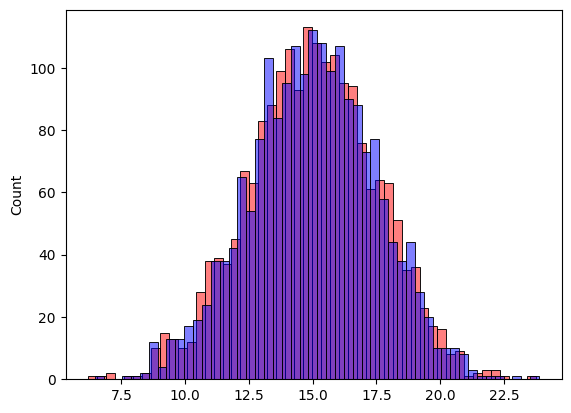

In [24]:
sns.histplot(y_val, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_val_zero, color='blue', alpha=0.5, bins=50)

In [25]:
# RMSE (With Zero Fill)
score = rmse(y_val, y_pred_val_zero)
round(score, 2)

np.float64(0.52)

In [26]:
# w0, w = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val, method='mean')

y_pred_val_mean = w0 + X_val_mean.dot(w)

In [27]:
y_pred_val_mean

array([10.79583964, 16.76934083, 13.36807622, ..., 17.2932117 ,
       13.20038242, 12.27897383])

In [28]:
y_val

array([10.23832756, 16.64156994, 12.86417061, ..., 17.11580737,
       13.44094193, 12.11451126])

In [29]:
# RMSE (With Mean Fill)
score = rmse(y_val, y_pred_val_mean)
round(score, 2)

np.float64(0.51)

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If multiple options give the same best RMSE, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [30]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]



In [31]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, method='zero')
    X_val = prepare_X(df_val, method='zero')
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 25.904357611049043 0.5228069974803171
0.01 22.365665803824967 0.5230773875404439
0.1 10.031903479271445 0.5260746881719847
1 1.5399174393234554 0.5299717572327396
5 0.3233672741699305 0.530650445203418
10 0.16270272430286703 0.530742309711743
100 0.016369304829543695 0.5308264158427242


## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

In [32]:
list_scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df_select.iloc[idx[:n_train]]
    df_val = df_select.iloc[idx[n_train:n_train+n_val]]
    df_test = df_select.iloc[idx[n_train+n_val:]]

    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train, method='zero')
    X_val = prepare_X(df_val, method='zero')

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    list_scores.append(score)

In [33]:
list_scores

[np.float64(0.5246488384683504),
 np.float64(0.5089089734390052),
 np.float64(0.5344054197821341),
 np.float64(0.5137583999137514),
 np.float64(0.5310747715244627),
 np.float64(0.5087174450703562),
 np.float64(0.5235985409173822),
 np.float64(0.5192182807694843),
 np.float64(0.5278093723619574),
 np.float64(0.5326045282165005)]

In [34]:
round(np.std(list_scores), 3)

np.float64(0.009)

### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [35]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df_select.iloc[idx[:n_train]]
df_val = df_select.iloc[idx[n_train:n_train+n_val]]
df_test = df_select.iloc[idx[n_train+n_val:]]

y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [36]:
df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, method='zero')

In [37]:
y_full_train = np.concatenate([y_train, y_val])

In [38]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [39]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.5109751966139211)